In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
import numpy as np 
import torchvision 
import torchvision.transforms as transforms

In [2]:
#Load the data
tran_dataset = torchvision.datasets.MNIST(
    root = ".",
    train=True,
    transform= transforms.ToTensor(),
    download=True
)

In [3]:
X_train = tran_dataset.data 
Y_train = tran_dataset.targets

In [4]:
print(X_train)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [5]:
torch.max(X_train)

tensor(255, dtype=torch.uint8)

In [6]:
X_train.shape

torch.Size([60000, 28, 28])

In [7]:
print(Y_train)

tensor([5, 0, 4,  ..., 5, 6, 8])


In [8]:
Y_train.shape

torch.Size([60000])

In [9]:
#Load the data
test_dataset = torchvision.datasets.MNIST(
    root = ".",
    train=False,
    transform= transforms.ToTensor(),
    download=True
)

In [10]:
test_dataset.data.shape 

torch.Size([10000, 28, 28])

In [11]:
#Build the Model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [13]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [15]:
#Batch
batch_size = 128 
train_loader = torch.utils.data.DataLoader(
    dataset = tran_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset = test_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [16]:
#Training
n_epochs = 10
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
for i in range(n_epochs):
    train_loss = []
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 784)
        optimizer.zero_grad()
        #training
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
    train_loss = np.mean(train_loss)
    test_loss = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 784)
       
        #training
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)
    train_losses[i] = train_loss
    test_losses[i] = test_loss 
    print(f"Epochs {i+1}/{n_epochs}: Train Loss {train_loss:.4f}, Test Loss {test_loss:.4f}")


Epochs 1/10: Train Loss 0.4092, Test Loss 0.2267
Epochs 2/10: Train Loss 0.1933, Test Loss 0.1589
Epochs 3/10: Train Loss 0.1405, Test Loss 0.1277
Epochs 4/10: Train Loss 0.1093, Test Loss 0.1060
Epochs 5/10: Train Loss 0.0891, Test Loss 0.0913
Epochs 6/10: Train Loss 0.0731, Test Loss 0.0909
Epochs 7/10: Train Loss 0.0619, Test Loss 0.0841
Epochs 8/10: Train Loss 0.0530, Test Loss 0.0803
Epochs 9/10: Train Loss 0.0450, Test Loss 0.0780
Epochs 10/10: Train Loss 0.0381, Test Loss 0.0739


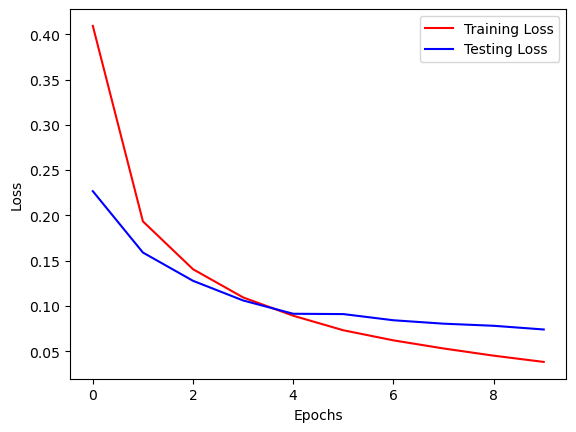

In [17]:
plt.plot(train_losses, "r", label="Training Loss")
plt.plot(test_losses, "b", label="Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [18]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0334, -0.0231,  0.0194,  ..., -0.0262,  0.0011,  0.0200],
                      [-0.0131, -0.0119, -0.0188,  ...,  0.0030, -0.0141, -0.0059],
                      [ 0.0342, -0.0243, -0.0210,  ...,  0.0283, -0.0319, -0.0344],
                      ...,
                      [-0.0331,  0.0069, -0.0041,  ...,  0.0131,  0.0183, -0.0212],
                      [-0.0145,  0.0166,  0.0156,  ...,  0.0030, -0.0167,  0.0222],
                      [-0.0198, -0.0112, -0.0279,  ..., -0.0057,  0.0187, -0.0023]],
                     device='cuda:0')),
             ('0.bias',
              tensor([ 6.4573e-02,  1.3519e-01,  3.5459e-02,  1.1246e-01,  8.6041e-02,
                       1.7951e-02,  5.6858e-02,  1.0081e-01,  9.5256e-02,  4.2068e-02,
                      -6.2276e-02,  1.2680e-02,  6.3882e-02,  1.9164e-01, -1.0989e-01,
                      -1.2706e-02,  1.1961e-01, -7.0211e-02, -3.4232e-02,  5.9718e-02,
                       1.2754e

In [19]:
torch.save(model.state_dict(), "MNIST model.pt")

<h3>Load the saved model and analyze accuracy and confusion matrix </h3>

In [20]:
#Build the Model
model2 = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [21]:
model2.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [22]:
model2.load_state_dict(torch.load("MNIST model.pt"))

<All keys matched successfully>

In [23]:
#Train
n_correct = 0
n_total = 0 

for inputs, targets in train_loader:

    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1, 784)

    outputs = model2(inputs)

    _, prediction = torch.max(outputs, 1)

    n_correct += (targets==prediction).sum().item()
    n_total += targets.shape[0]

train_accuracy = n_correct / n_total

#Test

n_correct = 0
n_total = 0 

for inputs, targets in test_loader:

    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1, 784)

    outputs = model2(inputs)

    _, prediction = torch.max(outputs, 1)

    n_correct += (targets==prediction).sum().item()
    n_total += targets.shape[0]

test_accuracy = n_correct / n_total

In [24]:
print(train_accuracy)
print(test_accuracy)

0.9917333333333334
0.9781


In [25]:
from sklearn.metrics import confusion_matrix

import pandas as pd
import itertools

In [26]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized COonfusion Matrix")
    else: 
        print("COnfusion Matrix, without normalization") 

    print(cm) 

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thres = cm.max() / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                    color="white" if cm[i, j] > thres else "black")
    plt.tight_layout()
    plt.ylabel("True label") 
    plt.xlabel("Predicted label")
    plt.show    



COnfusion Matrix, without normalization
[[104 108 104 106 109  74  88  90  92 105]
 [106 112 117 138 107 100 104 108 122 121]
 [ 94 116 105 100 123  88  95 100 110 101]
 [103 129 102 107  89  87  90  98 105 100]
 [ 90 120  97  90 109  90  91 106  92  97]
 [ 98 111 103  60  75  82  77  99  83 104]
 [110  94  97 109  93  75 102 100  87  91]
 [ 83 114 106 112  94  99 104 110 104 102]
 [ 92 127  94  82 103  84  90 108 101  93]
 [113  89 110 103  96 103 102 104  99  90]]


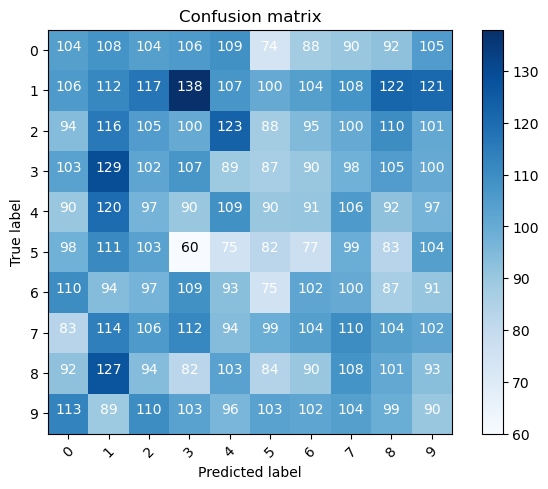

In [27]:
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([]) 

for inputs, targets in test_loader:
    inputs = inputs.to(device)

    inputs = inputs.view(-1, 784)

    outputs = model(inputs) 

    _, predictions = torch.max(outputs, 1)

    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


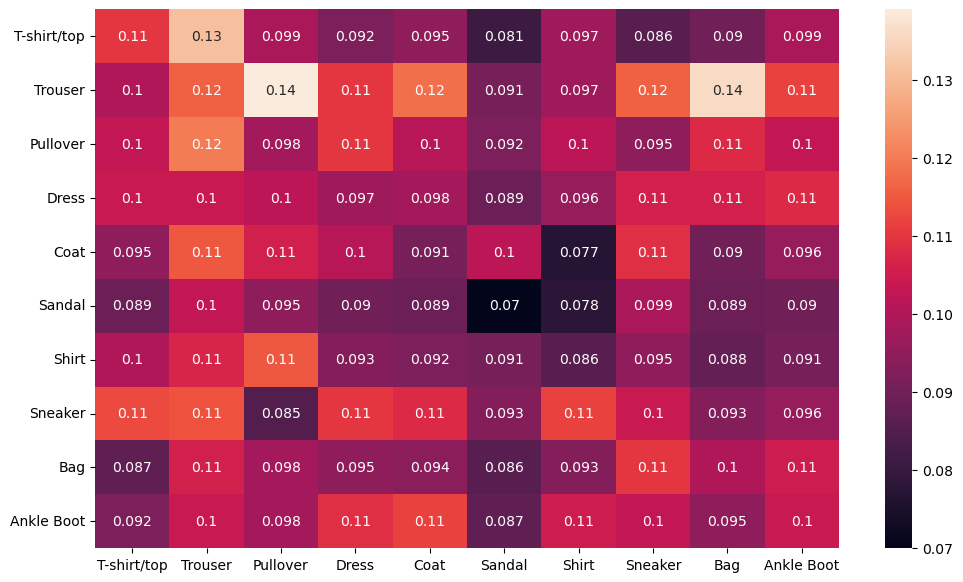

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([]) 

for inputs, targets in test_loader:
    inputs = inputs.to(device)

    inputs = inputs.view(-1, 784)

    outputs = model(inputs) 

    _, predictions = torch.max(outputs, 1)

    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
       

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Build confusion matrix

df_cm = pd.DataFrame(cm/np.sum(cm) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

Text(0.5, 1.0, 'True label: 4 Predicted: 7')

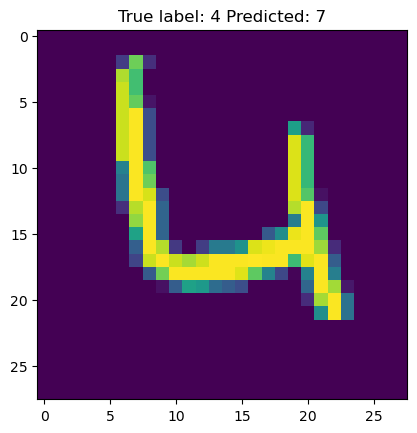

In [29]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
#print(x_test[i])
plt.imshow(x_test[i])
plt.title(f"True label: {y_test[i]} Predicted: {int(p_test[i])}")

Text(0.5, 1.0, 'True label: 8 Predicted: 7')

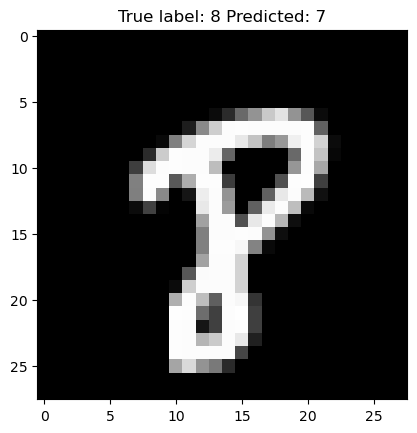

In [30]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
#print(x_test[i])
plt.imshow(x_test[i], cmap="gray")
plt.title(f"True label: {y_test[i]} Predicted: {int(p_test[i])}")

In [37]:
for inputs, targets in train_loader:
    inputs = inputs.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model2(inputs)
outputs.shape
print(outputs)
    

tensor([[-1.0231e+01,  4.8381e+00, -4.9283e+00, -2.4828e+00, -3.3944e+00,
         -8.5780e+00, -7.1583e+00,  1.3411e-01, -1.6221e+00, -4.8489e+00],
        [-3.0997e+00, -2.5358e+01,  5.4562e+00, -4.1527e+00, -1.5289e+01,
         -1.1917e+01, -1.4774e+01,  5.2527e-01,  8.4759e+00, -7.0318e+00],
        [-1.0204e+01, -7.0769e+00, -7.2129e+00, -4.7869e+00,  1.0371e+01,
         -7.0959e+00, -1.0569e+01, -3.2654e+00, -2.4002e+00,  2.9483e+00],
        [-7.8281e-01, -1.9490e+01,  1.9506e-02, -1.4214e+01,  3.9118e+00,
         -5.8655e+00,  1.1882e+01, -7.1488e+00, -5.2492e+00, -4.1395e+00],
        [-9.3079e+00,  7.7088e+00, -6.3097e+00, -3.6174e+00, -6.8925e-01,
         -1.0902e+01, -8.6351e+00,  7.5005e-01, -1.9256e+00, -6.8196e+00],
        [ 1.2435e+01, -1.8971e+01, -6.4590e+00, -3.7014e+00, -8.1758e+00,
         -2.7463e+00, -2.4467e-02, -9.7237e+00, -2.3962e-01, -5.6470e+00],
        [-1.3856e+01, -8.2321e+00, -1.0131e+01,  3.5699e+00, -1.7998e+01,
          1.4159e+01, -6.5435e+0

torch.Size([96, 10])

In [40]:
for inputs, targets in test_loader:
    print(targets)

tensor([0, 6, 8, 8, 8, 0, 3, 7, 9, 3, 8, 7, 2, 1, 5, 0, 1, 1, 1, 2, 7, 5, 0, 5,
        3, 0, 4, 9, 4, 2, 8, 6, 3, 5, 0, 2, 4, 0, 4, 0, 1, 1, 7, 3, 8, 8, 4, 7,
        7, 9, 0, 1, 8, 8, 2, 1, 0, 7, 2, 1, 2, 5, 9, 7, 7, 4, 8, 7, 1, 1, 4, 1,
        5, 2, 2, 3, 3, 1, 4, 3, 8, 5, 9, 0, 3, 4, 7, 2, 0, 1, 6, 2, 5, 7, 9, 9,
        7, 7, 8, 2, 4, 4, 0, 9, 0, 8, 6, 4, 6, 8, 0, 6, 2, 0, 5, 6, 5, 0, 4, 5,
        4, 2, 0, 6, 3, 3, 9, 6])
tensor([6, 6, 0, 9, 4, 1, 9, 2, 2, 3, 6, 1, 5, 3, 8, 1, 5, 7, 1, 1, 4, 6, 7, 7,
        2, 0, 9, 8, 9, 8, 4, 2, 0, 8, 4, 4, 2, 0, 7, 1, 4, 6, 1, 0, 3, 4, 6, 8,
        5, 7, 5, 1, 1, 4, 4, 1, 9, 7, 3, 0, 0, 6, 2, 0, 9, 2, 9, 2, 5, 6, 1, 7,
        5, 7, 9, 5, 1, 0, 9, 4, 2, 3, 5, 7, 0, 4, 5, 7, 6, 9, 3, 1, 2, 7, 7, 8,
        8, 8, 2, 0, 7, 4, 6, 2, 6, 0, 8, 4, 9, 4, 0, 3, 1, 2, 1, 8, 3, 6, 8, 7,
        4, 6, 7, 7, 7, 5, 9, 2])
tensor([4, 2, 6, 5, 8, 5, 9, 1, 7, 2, 6, 8, 1, 2, 7, 7, 5, 6, 2, 2, 9, 1, 8, 8,
        4, 1, 6, 0, 4, 7, 9, 7, 7, 1, 1, 7, 0, 2, 8, 4

torch.Size([16])